# Monte Carlo Simulation on Randomized Grid Search
To verify rule of thumbs from https://towardsdatascience.com/hyper-parameter-tuning-with-randomised-grid-search-54f865d27926  

<i>With 60 iterations, 95% of the time, best 5% sets of parameters can be found, regardless of grid size.</i>

 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm 

plt.style.use('ggplot')

In [71]:
def search_top5_parameters(params_size):
    ###############################################################
    # Create a dataframe with two columns
    # data: int sequence from 0 to n-1 
    # top5_pct: bool sequence with length, only 5% of them is True
    #           True indicates top 5 percent data
    # tried: bool sequence with length n
    #        True indicates the data was tried in early iteration
    ##############################################################
    top_5 = np.random.choice(range(params_size), 5, False)
    df = pd.DataFrame({
                        'params_index': list(range(params_size)), 
                        'top5_pct': [False]*params_size
                       })
    df.loc[top_5, 'top5_pct']=True
    
    ###############################
    # Search for top 5 parameters
    # Return number of trials
    ###############################
    search_space = range(params_size)
    for i in range(60):
        picked_number = np.random.choice(search_space, 1)
        df.loc[picked_number, 'tried'] = True
        
        if picked_number in top_5:
            return True
        
    return False

def simulation(num_trials, params_size):
    result = [search_top5_parameters(100) for i in tqdm(range(num_trials))]
    s = pd.Series(result).value_counts()
    s = s / s.sum()

    # Plot
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.pie(s,labels=["Yes", "No"], colors=["lightgreen", "lightcoral"], shadow=True, autopct='%0.2f%%')
    ax.set_aspect('equal')
    ax.set_title('Found top 5% hyperparameters within 60 iterations\n# Trials = {}, # Parameter Sets = {}'.format(num_trials, params_size))
    plt.show()

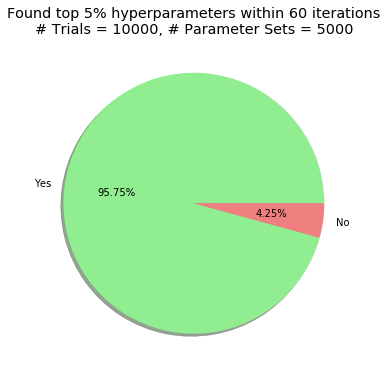

In [72]:
simulation(10000, 5000)